In [9]:
#მსაჯების მიერ ჩატარებული მაჩტების რაოდენობა. 
referee_counts = data['Referee'].value_counts()
msaji = referee_counts.head(30)
print("ტოპ 30 მსაჯი რომელმაც ყველაზე მეტჯერ ჩაატარა შეხვედრა:")
print(msaji)

ტოპ 30 მსაჯი რომელმაც ყველაზე მეტჯერ ჩაატარა შეხვედრა:
Herb Dean               858
John McCarthy           640
Dan Miragliotta         400
Mario Yamasaki          392
Marc Goddard            346
Yves Lavigne            264
Steve Mazzagatti        201
Leon Roberts            192
Keith Peterson          189
Jason Herzog            178
Chris Tognoni           162
Mark Smith              146
Josh Rosenthal          122
Kevin MacDonald          82
Steve Perceval           78
Jerin Valel              75
John Sharp               75
Kevin Mulhall            62
Kerry Hatley             51
Osiris Maia              47
Neil Hall                43
Kim Winslow              42
Kevin Sataki             41
Todd Ronald Anderson     39
Larry Landless           38
Mike Beltran             38
Jacob Montalvo           37
Greg Kleynjans           36
Eduardo Herdy            33
Grant Waterman           31
Name: Referee, dtype: int64


In [10]:
#წონითი კატეგორიის მიხედვით ბრძოლები

weight_class_counts = data['weight_class'].value_counts()
most_fights_weight_class = weight_class_counts.idxmax()
print("Weight class with the most fights:", most_fights_weight_class)
print("\nNumber of fights per weight class:")
print(weight_class_counts)

Weight class with the most fights: Lightweight

Number of fights per weight class:
Lightweight           1091
Welterweight          1083
Middleweight           813
Heavyweight            585
LightHeavyweight       573
Featherweight          551
Bantamweight           475
Flyweight              230
WomenStrawweight       192
WomenBantamweight      151
WomenFlyweight         112
OpenWeight              86
CatchWeight             54
WomenFeatherweight      16
Name: weight_class, dtype: int64


In [11]:
#მაჩტების რაოდენობა ლოკაციის მიხედვით
matches_by_location = data['location'].value_counts()
print("Number of matches by location:")
print(matches_by_location)


Number of matches by location:
Las Vegas, Nevada, USA                        1565
Abu Dhabi, Abu Dhabi, United Arab Emirates     157
London, England, United Kingdom                114
Newark, New Jersey, USA                         90
Anaheim, California, USA                        84
                                              ... 
Bossier City, Louisiana, USA                     8
Miami, Florida, USA                              8
Yokohama, Kanagawa, Japan                        7
Dothan, Alabama, USA                             7
Chiba, Japan                                     7
Name: location, Length: 166, dtype: int64


In [12]:
#სატიტულო ბრძოლები წონითი კატეგორიის მიხედვით
title_bouts = data[data['title_bout'] == True]
title_fights_by_weight_class = title_bouts['weight_class'].value_counts()
print("Title fights by weight class:")
print(title_fights_by_weight_class)


Title fights by weight class:
Welterweight          57
Heavyweight           54
LightHeavyweight      53
Lightweight           44
Middleweight          44
Bantamweight          22
Featherweight         22
Flyweight             17
WomenBantamweight     15
WomenStrawweight      13
CatchWeight           10
WomenFeatherweight     8
WomenFlyweight         6
Name: weight_class, dtype: int64


In [13]:
#Top 10 მებრძოლი ყველაზე მეტი სტრაიკინგის გაშვებით
strikes_landed = pd.DataFrame({
    'Fighter': data['B_fighter'],
    'Strikes Landed': data['B_avg_SIG_STR_landed']
})
strikes_landed = strikes_landed.groupby('Fighter')['Strikes Landed'].sum()
top_10_fighters = strikes_landed.sort_values(ascending=False).head(10)
print("Top 10 fighters with the most strikes landed:")
print(top_10_fighters)

Top 10 fighters with the most strikes landed:
Fighter
Angela Hill        969.044312
Evan Dunham        835.150234
Jeremy Stephens    719.156948
Nik Lentz          692.697624
Max Holloway       655.332414
Nate Diaz          606.903248
Tim Means          581.310464
Jorge Masvidal     569.495865
Donald Cerrone     550.511015
Rick Story         540.216110
Name: Strikes Landed, dtype: float64


In [21]:
#კორელაცია წვდომსა და ბრძოლის შედეგს შორის
import pandas as pd

reach_outcomes = data[['B_Reach_cms', 'R_Reach_cms', 'Winner']]

reach_outcomes = reach_outcomes.dropna(subset=['B_Reach_cms', 'R_Reach_cms'])

correlation = reach_outcomes['B_Reach_cms'].corr(reach_outcomes['R_Reach_cms'])

print("Correlation between reach and fight outcomes:", correlation)


Correlation between reach and fight outcomes: 0.6913190728301869


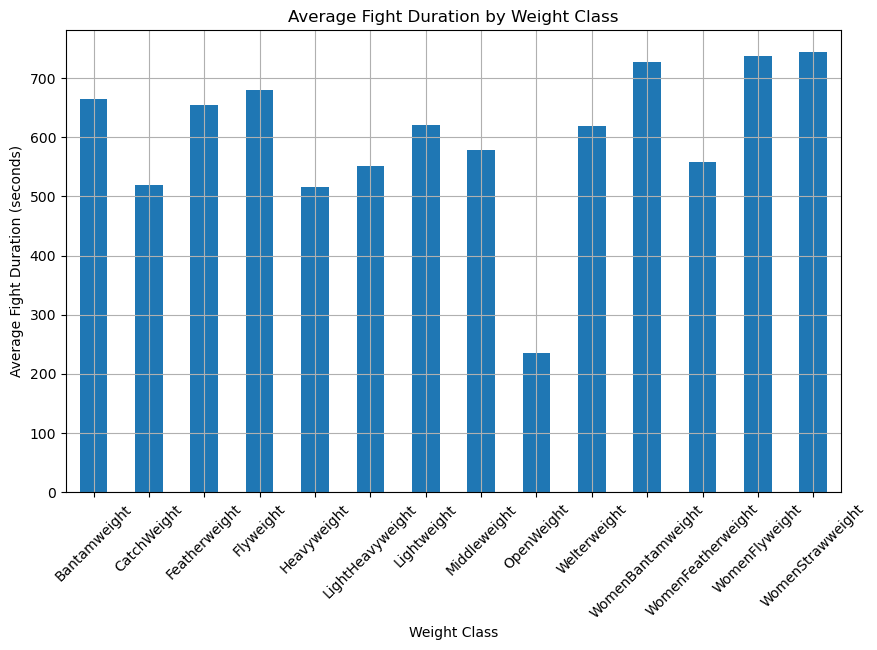

In [24]:
#ბრძოლის საშუალო ხანგრძლივობა და წონითი კატეგორიის კორელაცია
import pandas as pd
import matplotlib.pyplot as plt

average_duration = data.groupby('weight_class')['B_total_time_fought(seconds)'].mean()

plt.figure(figsize=(10, 6))
average_duration.plot(kind='bar')
plt.xlabel('Weight Class')
plt.ylabel('Average Fight Duration (seconds)')
plt.title('Average Fight Duration by Weight Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [32]:
import pandas as pd
#ყველაზე მეტი გდებები თითო მატჩში
top_10_takedowns = data[['R_fighter', 'B_fighter', 'R_avg_TD_landed', 'B_avg_TD_landed']] \
    .rename(columns={'R_fighter': 'Fighter', 'B_fighter': 'Fighter', 'R_avg_TD_landed': 'Red_Takedowns', 'B_avg_TD_landed': 'Blue_Takedowns'}) \
    .nlargest(10, ['Red_Takedowns']) \
    .reset_index(drop=True)
print("ყველაზე მეტი გდებები თითო მატჩში პიველი მებრძოლი მიერ:")
print(top_10_takedowns[['Fighter', 'Red_Takedowns']])

ყველაზე მეტი გდებები თითო მატჩში პიველი მებრძოლი მიერ:
              Fighter           Fighter  Red_Takedowns
0   Merab Dvalishvili       Ricky Simon      11.000000
1         Brett Johns    Albert Morales      11.000000
2   Georges St-Pierre     Josh Koscheck       9.133423
3      Rodney Wallace        Phil Davis       9.000000
4        Jamie Varner     Jason Gilliam       9.000000
5   Merab Dvalishvili     Gustavo Lopez       8.937500
6   Merab Dvalishvili      Terrion Ware       8.500000
7      Curtis Blaydes     Derrick Lewis       8.229980
8  Demetrious Johnson  Joseph Benavidez       8.132812
9     Enrique Barzola     Kevin Aguilar       8.000000
